In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


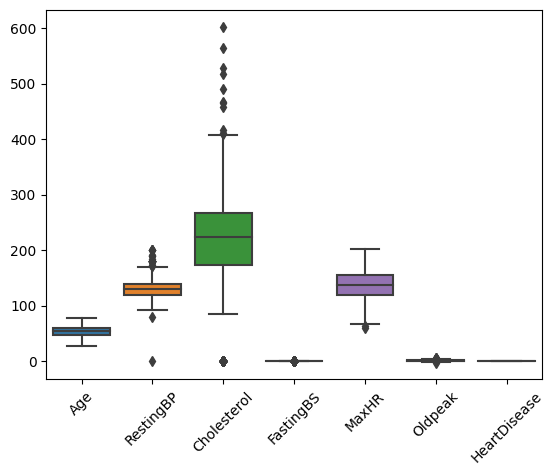

In [5]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
z_Rbp = (df['RestingBP']-df['RestingBP'].mean())/(df['RestingBP'].std())
z_col = (df['Cholesterol']-df['Cholesterol'].mean())/(df['Cholesterol'].std())    
df['z_col'] = z_col
df['z_Rbp'] = z_Rbp

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_col,z_Rbp
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621,0.410685
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,1.490940
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768,-0.129442
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,0.302660
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,0.950812


In [8]:
df[df.z_Rbp<-3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_col,z_Rbp
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,-1.817444,-7.151097


<AxesSubplot:xlabel='z_col', ylabel='Count'>

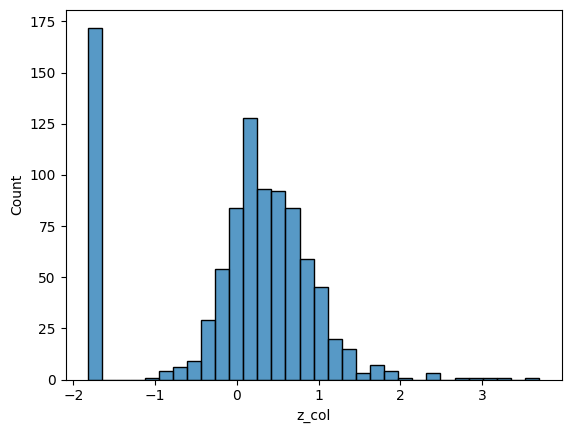

In [9]:
sns.histplot(df.z_col)

In [43]:
df = df[(df['z_col']<3) & (df['z_col']>-3) & (df['z_Rbp']<3) & (df['z_Rbp']>-3) ]

In [45]:
df.shape

(907, 14)

In [46]:
x = df.drop('HeartDisease',axis=1)

In [47]:
df_dummies = pd.get_dummies(x,drop_first=True)

In [48]:
df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,z_col,z_Rbp,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.824621,0.410685,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,-0.171867,1.490940,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0.769768,-0.129442,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0.138964,0.302660,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,-0.034736,0.950812,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.596068,-1.209697,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,-0.053020,0.626736,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,-0.619830,-0.129442,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0.340090,-0.129442,0,1,0,0,0,0,0,1,0


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_dummies)

In [51]:
df_scale = pd.DataFrame(df_scale)

In [52]:
df_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.433129,0.460442,0.849753,-0.548900,1.386470,-0.830485,0.849753,0.460442,0.514775,2.074631,-0.53187,-0.231141,0.813125,-0.492408,-0.822511,-0.998898,1.143629
1,-0.477827,1.624542,-0.167085,-0.548900,0.756110,0.109315,-0.167085,1.624542,-1.942597,-0.482013,1.88016,-0.231141,0.813125,-0.492408,-0.822511,1.001103,-0.874409
2,-1.751563,-0.121608,0.793780,-0.548900,-1.528943,-0.830485,0.793780,-0.121608,0.514775,2.074631,-0.53187,-0.231141,-1.229823,2.030836,-0.822511,-0.998898,1.143629
3,-0.583971,0.344032,0.150094,-0.548900,-1.134969,0.579216,0.150094,0.344032,-1.942597,-0.482013,-0.53187,-0.231141,0.813125,-0.492408,1.215789,1.001103,-0.874409
4,0.052897,1.042492,-0.027153,-0.548900,-0.583404,-0.830485,-0.027153,1.042492,0.514775,-0.482013,1.88016,-0.231141,0.813125,-0.492408,-0.822511,-0.998898,1.143629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.902405,-1.285708,0.616533,-0.548900,-0.189429,0.297275,0.616533,-1.285708,0.514775,-0.482013,-0.53187,4.326360,0.813125,-0.492408,-0.822511,1.001103,-0.874409
903,1.538923,0.693262,-0.045811,1.821825,0.165148,2.364836,-0.045811,0.693262,0.514775,-0.482013,-0.53187,-0.231141,0.813125,-0.492408,-0.822511,1.001103,-0.874409
904,0.371331,-0.121608,-0.624196,-0.548900,-0.859186,0.297275,-0.624196,-0.121608,0.514775,-0.482013,-0.53187,-0.231141,0.813125,-0.492408,1.215789,1.001103,-0.874409
905,0.371331,-0.121608,0.355327,-0.548900,1.465265,-0.830485,0.355327,-0.121608,-1.942597,2.074631,-0.53187,-0.231141,-1.229823,-0.492408,-0.822511,1.001103,-0.874409


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [59]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scale)

In [60]:
df_pca.shape

(907, 10)

In [61]:
y = df.HeartDisease

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

In [65]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8681318681318682